In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt


# Telco Customer Churn Dataset Description

## 🎯 Objective
The main goal is to predict whether a customer will **churn** (i.e., leave the service) based on their demographics, account information, and service usage.

---

## 📦 Dataset Overview
- **Rows**: 7043
- **Columns**: 21

---

## 🔍 Column Descriptions

| Column Name         | Description |
|---------------------|-------------|
| `customerID`        | Unique ID assigned to each customer. Not useful for modeling and can be dropped. |
| `gender`            | Customer’s gender: Male or Female. |
| `SeniorCitizen`     | Indicates if the customer is a senior citizen: 1 = Yes, 0 = No. |
| `Partner`           | Indicates if the customer has a partner: Yes or No. |
| `Dependents`        | Indicates if the customer has dependents (e.g., children): Yes or No. |
| `tenure`            | Number of months the customer has been with the company. |
| `PhoneService`      | Indicates if the customer has phone service: Yes or No. |
| `MultipleLines`     | Indicates if the customer has multiple phone lines: Yes, No, or No phone service. |
| `InternetService`   | Type of internet service: DSL, Fiber optic, or No. |
| `OnlineSecurity`    | Indicates if the customer has online security add-on: Yes, No, or No internet service. |
| `OnlineBackup`      | Indicates if the customer has online backup service: Yes, No, or No internet service. |
| `DeviceProtection`  | Indicates if the customer has device protection: Yes, No, or No internet service. |
| `TechSupport`       | Indicates if the customer has tech support: Yes, No, or No internet service. |
| `StreamingTV`       | Indicates if the customer has streaming TV: Yes, No, or No internet service. |
| `StreamingMovies`   | Indicates if the customer has streaming movies: Yes, No, or No internet service. |
| `Contract`          | Type of contract: Month-to-month, One year, or Two year. |
| `PaperlessBilling`  | Indicates if the customer uses paperless billing: Yes or No. |
| `PaymentMethod`     | Method of payment: e.g., Electronic check, Mailed check, etc. |
| `MonthlyCharges`    | Amount charged to the customer monthly. |
| `TotalCharges`      | Total amount charged to the customer (may contain missing values for new customers). |
| `Churn`             | **Target variable**: Indicates if the customer churned: Yes or No. |

---

## ✅ Notes
- **Categorical Features**: `gender`, `Partner`, `Dependents`, `Contract`, etc.
- **Numerical Features**: `tenure`, `MonthlyCharges`, `TotalCharges`
- `TotalCharges` might be stored as string due to bad formatting; needs to be converted to numeric.



In [2]:
# 2. Load Dataset
df = pd.read_csv('../data/raw/rawdata.csv')  

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
for col in df.columns:
    print(f"Column: {col}")
    print("Unique values:")
    print(df[col].unique())
    print("="*30)


Column: customerID
Unique values:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender
Unique values:
['Female' 'Male']
Column: SeniorCitizen
Unique values:
[0 1]
Column: Partner
Unique values:
['Yes' 'No']
Column: Dependents
Unique values:
['No' 'Yes']
Column: tenure
Unique values:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService
Unique values:
['No' 'Yes']
Column: MultipleLines
Unique values:
['No phone service' 'No' 'Yes']
Column: InternetService
Unique values:
['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity
Unique values:
['No' 'Yes' 'No internet service']
Column: OnlineBackup
Unique values:
['Yes' 'No' 'No internet service']
Column: DeviceProtection
Unique values:
['No' 'Yes' 'No internet service']
Column: TechSupport
Unique values:
['No' '

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df['TotalCharges'].isnull().sum()

11

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df['TotalCharges'].fillna((df['TotalCharges'].mean()), inplace=True)
df.isnull().sum()   

C:\Users\user\AppData\Local\Temp\ipykernel_15004\2819633103.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna((df['TotalCharges'].mean()), inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

#### Distribution of target columns

In [118]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_8928\2609531206.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='crest')


<Axes: xlabel='Churn', ylabel='count'>

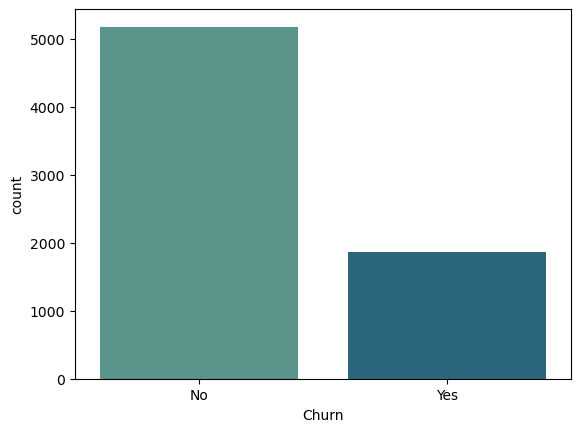

In [119]:
sns.countplot(x='Churn', data=df, palette='crest')

The distribution of the binary classes shows a slight data imbalance that needs attention

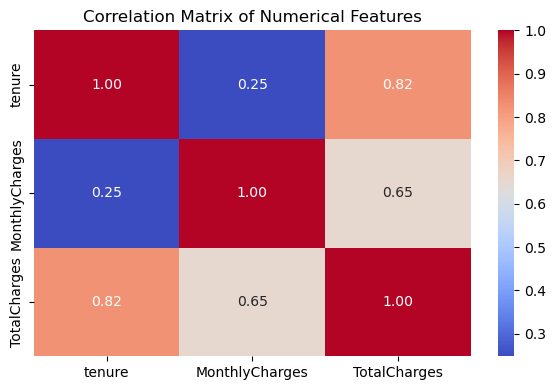

In [15]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df[numerical_features]
corr_matrix = df_num.corr()
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

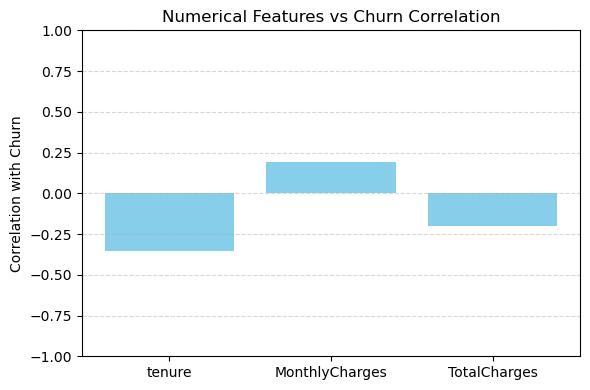

In [17]:
from scipy.stats import pointbiserialr
import pandas as pd
import matplotlib.pyplot as plt


# Drop NaNs
df_clean = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].dropna()

# Encode Churn
df_clean['Churn_encoded'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

# Calculate correlations
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlations = [
    pointbiserialr(df_clean['Churn_encoded'], df_clean[feature])[0]
    for feature in features
]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(features, correlations, color='skyblue')
plt.ylabel('Correlation with Churn')
plt.title('Numerical Features vs Churn Correlation')
plt.ylim(-1, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Categorical features count plot

C:\Users\user\AppData\Local\Temp\ipykernel_8928\696605972.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
C:\Users\user\AppData\Local\Temp\ipykernel_8928\696605972.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
C:\Users\user\AppData\Local\Temp\ipykernel_8928\696605972.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
C:\Users\user\AppData\Local\Temp\ipykernel_8928\696605972.

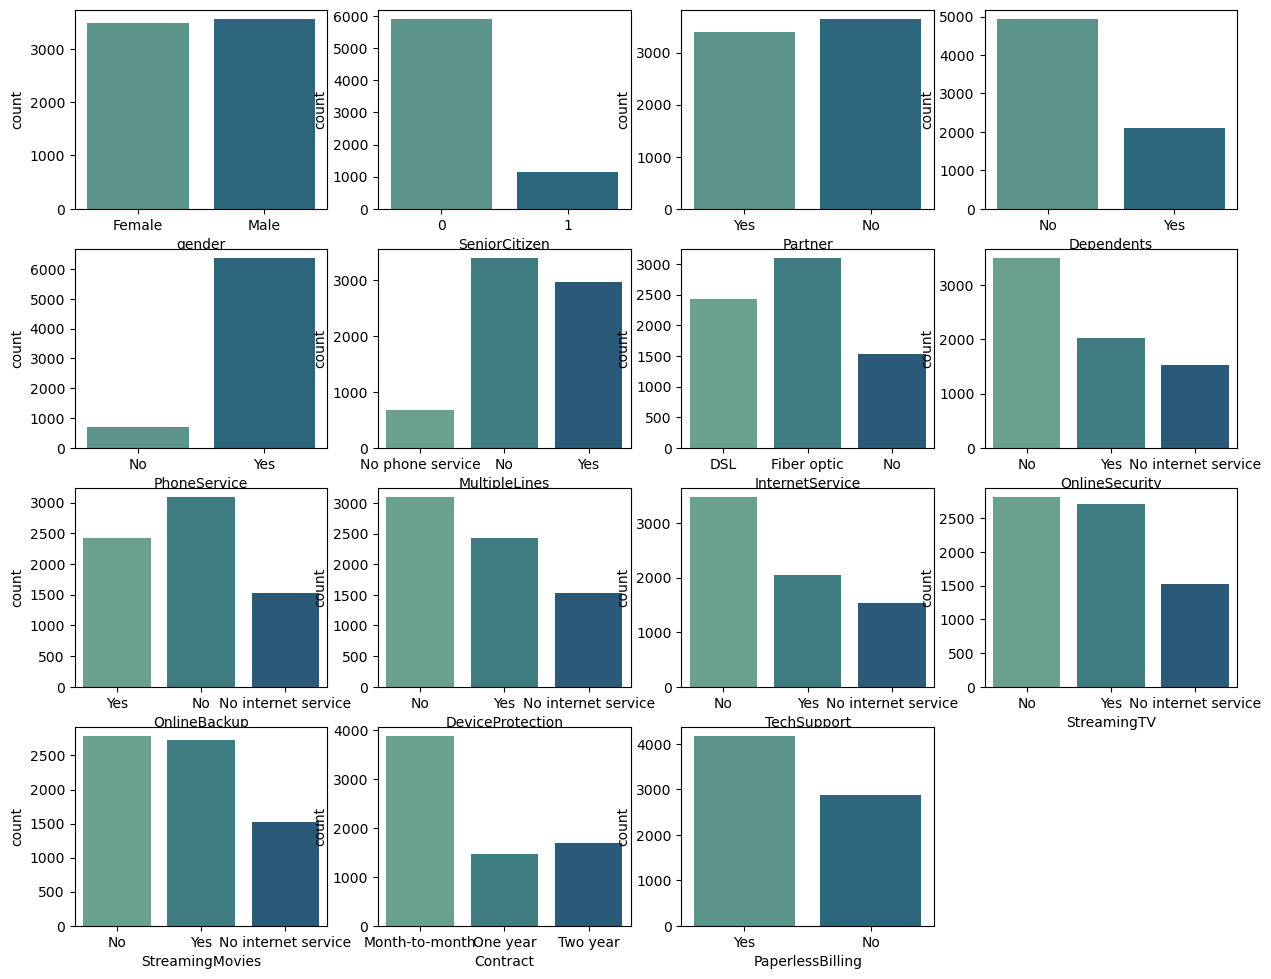

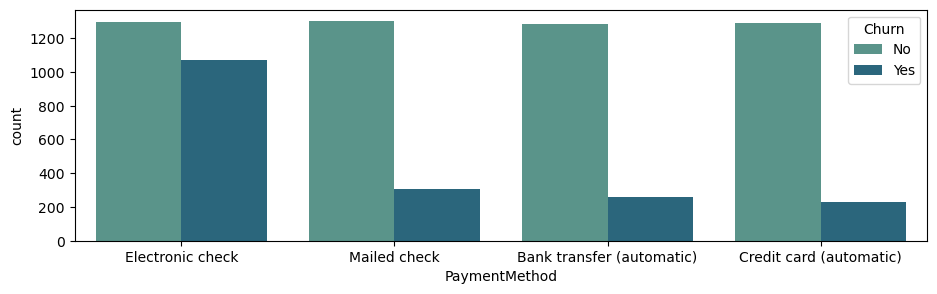

<Figure size 640x480 with 0 Axes>

In [120]:
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show() 
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=df, palette='crest')
plt.show() 
plt.tight_layout()

The gender count plot shows an equally distribution of males and females in the dataset.

Some features have 'No' and 'No Internet Service' or 'No Phone Service' as a separate category which don't give new info and could all be considered as 'No' label

### Histogram & Boxplots of continous features

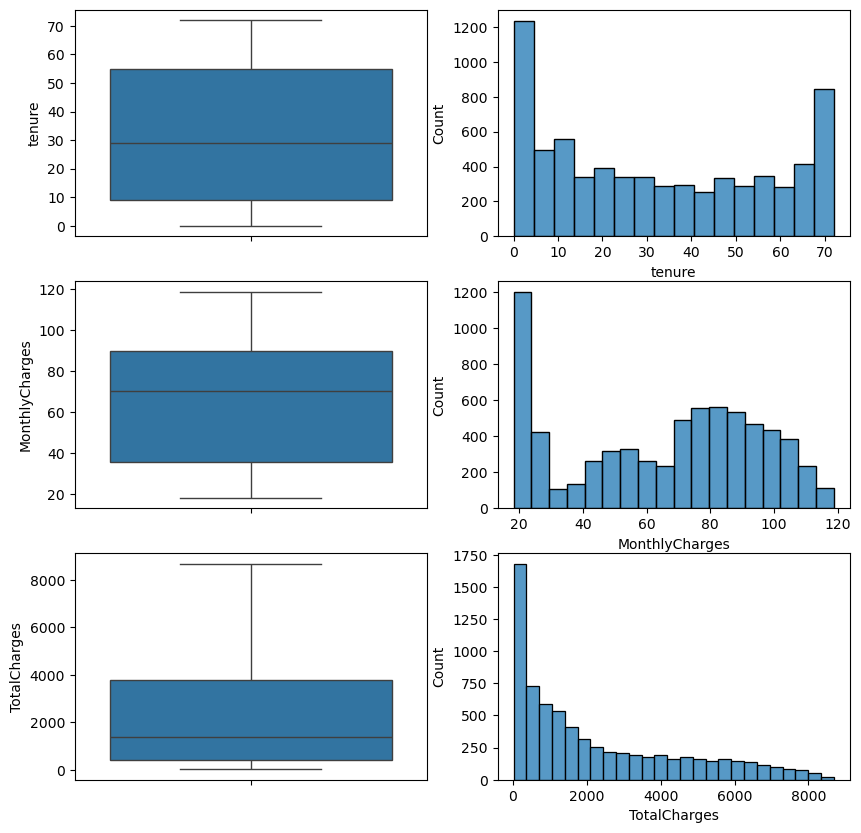

In [121]:
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
_ = sns.boxplot(y= df['tenure'])
plt.subplot(3, 2, 2)
_ = sns.histplot(x='tenure', data=df)

plt.subplot(3, 2, 3)
_ = sns.boxplot(y= df['MonthlyCharges'])
plt.subplot(3, 2, 4)
_ = sns.histplot(x='MonthlyCharges', data=df)

plt.subplot(3, 2, 5)
_ = sns.boxplot(y= df['TotalCharges'])
plt.subplot(3, 2, 6)
_ = sns.histplot(x='TotalCharges', data=df)

Boxplots show that there are No outliers in the continuous variables

Histograms show right skewness in the 'TotalCharges' feature

### Scatter plot of Monthly Charges versus Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

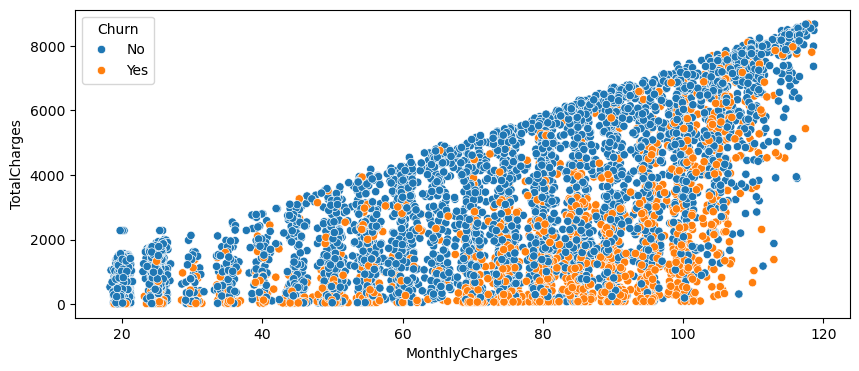

In [122]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

This implies a positive correlation between the monthly charges, and total charges.

The churn rate increases with the increase in monthly charges.

#### Replacing 'No internet service' and 'No phone service' with 'No'

In [123]:
df.replace(['No internet service','No phone service'], 'No', inplace=True)

In [124]:
for col in df.columns:
    print(f"Column: {col}")
    print("Unique values:")
    print(df[col].unique())
    print("="*30)

Column: customerID
Unique values:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender
Unique values:
['Female' 'Male']
Column: SeniorCitizen
Unique values:
[0 1]
Column: Partner
Unique values:
['Yes' 'No']
Column: Dependents
Unique values:
['No' 'Yes']
Column: tenure
Unique values:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService
Unique values:
['No' 'Yes']
Column: MultipleLines
Unique values:
['No' 'Yes']
Column: InternetService
Unique values:
['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity
Unique values:
['No' 'Yes']
Column: OnlineBackup
Unique values:
['Yes' 'No']
Column: DeviceProtection
Unique values:
['No' 'Yes']
Column: TechSupport
Unique values:
['No' 'Yes']
Column: StreamingTV
Unique values:
['No' 'Yes']
Column: StreamingMovies
Unique 

### Encoding categorical features

One-Hot encoding all categorical features.


Encode by mapping target feature.

In [126]:
# One-hot encoding
cat_cols = ['gender', 'InternetService','PaymentMethod','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 
          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract']


df1 = pd.concat([df, pd.get_dummies(df[cat_cols], drop_first=True)], axis=1)
df1 = df1.drop(columns=cat_cols)

# Mapping target variable
df1['Churn'] = np.where(df1['Churn'] == 'Yes', 1, 0)


In [128]:
df1

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),...,PaperlessBilling_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,7590-VHVEG,0,1,29.85,29.85,0,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,5575-GNVDE,0,34,56.95,1889.50,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,3668-QPYBK,0,2,53.85,108.15,1,True,False,False,False,...,True,False,True,True,False,False,False,False,False,False
3,7795-CFOCW,0,45,42.30,1840.75,0,True,False,False,False,...,False,False,True,False,True,True,False,False,True,False
4,9237-HQITU,0,2,70.70,151.65,1,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0,True,False,False,False,...,True,True,True,False,True,True,True,True,True,False
7039,2234-XADUH,0,72,103.20,7362.90,0,False,True,False,True,...,True,True,False,True,True,False,True,True,True,False
7040,4801-JZAZL,0,11,29.60,346.45,0,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
7041,8361-LTMKD,1,4,74.40,306.60,1,True,True,False,False,...,True,True,False,False,False,False,False,False,False,False


In [129]:
df1 = df1.drop(columns=['customerID'])


In [130]:
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,PaperlessBilling_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,0,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
1,0,34,56.95,1889.50,0,True,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,0,2,53.85,108.15,1,True,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
3,0,45,42.30,1840.75,0,True,False,False,False,False,...,False,False,True,False,True,True,False,False,True,False
4,0,2,70.70,151.65,1,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,False,False,False,False,...,True,True,True,False,True,True,True,True,True,False
7039,0,72,103.20,7362.90,0,False,True,False,True,False,...,True,True,False,True,True,False,True,True,True,False
7040,0,11,29.60,346.45,0,False,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False
7041,1,4,74.40,306.60,1,True,True,False,False,False,...,True,True,False,False,False,False,False,False,False,False


In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int32  
 5   gender_Male                            7043 non-null   bool   
 6   InternetService_Fiber optic            7043 non-null   bool   
 7   InternetService_No                     7043 non-null   bool   
 8   PaymentMethod_Credit card (automatic)  7043 non-null   bool   
 9   PaymentMethod_Electronic check         7043 non-null   bool   
 10  PaymentMethod_Mailed check             7043 non-null   bool   
 11  Part

In [134]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,PaperlessBilling_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,0,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
1,0,34,56.95,1889.50,0,True,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,0,2,53.85,108.15,1,True,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
3,0,45,42.30,1840.75,0,True,False,False,False,False,...,False,False,True,False,True,True,False,False,True,False
4,0,2,70.70,151.65,1,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
# df1.to_csv('../data/processed/1_dataset_encoded.csv', index=False)  

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
